## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.10094117185431159


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.034573
0:	learn: 0.9806058	total: 58.4ms	remaining: 58.3s
1:	learn: 0.9606716	total: 59.3ms	remaining: 29.6s
2:	learn: 0.9390920	total: 60.1ms	remaining: 20s
3:	learn: 0.9209237	total: 60.7ms	remaining: 15.1s
4:	learn: 0.9046978	total: 61.5ms	remaining: 12.2s
5:	learn: 0.8896854	total: 62.2ms	remaining: 10.3s
6:	learn: 0.8724151	total: 62.9ms	remaining: 8.92s
7:	learn: 0.8558633	total: 63.5ms	remaining: 7.87s
8:	learn: 0.8400199	total: 64.1ms	remaining: 7.06s
9:	learn: 0.8229065	total: 64.7ms	remaining: 6.41s
10:	learn: 0.8057776	total: 65.4ms	remaining: 5.88s
11:	learn: 0.7907426	total: 66ms	remaining: 5.43s
12:	learn: 0.7753485	total: 66.6ms	remaining: 5.06s
13:	learn: 0.7601130	total: 67.7ms	remaining: 4.77s
14:	learn: 0.7475256	total: 68.9ms	remaining: 4.53s
15:	learn: 0.7326054	total: 70.2ms	remaining: 4.31s
16:	learn: 0.7206853	total: 71.3ms	remaining: 4.12s
17:	learn: 0.7077303	total: 72.1ms	remaining: 3.93s
18:	learn: 0.6955287	total: 73ms	remaining: 3.77

71:	learn: 0.3674029	total: 126ms	remaining: 1.63s
72:	learn: 0.3650922	total: 127ms	remaining: 1.62s
73:	learn: 0.3623273	total: 128ms	remaining: 1.6s
74:	learn: 0.3592857	total: 129ms	remaining: 1.59s
75:	learn: 0.3566659	total: 130ms	remaining: 1.58s
76:	learn: 0.3534377	total: 132ms	remaining: 1.58s
77:	learn: 0.3515212	total: 133ms	remaining: 1.57s
78:	learn: 0.3495794	total: 134ms	remaining: 1.56s
79:	learn: 0.3474536	total: 135ms	remaining: 1.55s
80:	learn: 0.3451276	total: 136ms	remaining: 1.54s
81:	learn: 0.3429903	total: 137ms	remaining: 1.53s
82:	learn: 0.3407333	total: 138ms	remaining: 1.52s
83:	learn: 0.3383421	total: 139ms	remaining: 1.51s
84:	learn: 0.3363138	total: 140ms	remaining: 1.5s
85:	learn: 0.3341552	total: 140ms	remaining: 1.49s
86:	learn: 0.3312622	total: 141ms	remaining: 1.48s
87:	learn: 0.3291335	total: 142ms	remaining: 1.47s
88:	learn: 0.3267592	total: 143ms	remaining: 1.46s
89:	learn: 0.3246472	total: 144ms	remaining: 1.45s
90:	learn: 0.3226321	total: 145ms

134:	learn: 0.2679522	total: 187ms	remaining: 1.2s
135:	learn: 0.2666442	total: 188ms	remaining: 1.19s
136:	learn: 0.2656536	total: 188ms	remaining: 1.19s
137:	learn: 0.2644756	total: 189ms	remaining: 1.18s
138:	learn: 0.2634933	total: 190ms	remaining: 1.18s
139:	learn: 0.2624546	total: 191ms	remaining: 1.17s
140:	learn: 0.2619103	total: 192ms	remaining: 1.17s
141:	learn: 0.2611219	total: 193ms	remaining: 1.17s
142:	learn: 0.2604558	total: 194ms	remaining: 1.16s
143:	learn: 0.2590422	total: 195ms	remaining: 1.16s
144:	learn: 0.2583398	total: 197ms	remaining: 1.16s
145:	learn: 0.2574131	total: 198ms	remaining: 1.16s
146:	learn: 0.2561256	total: 199ms	remaining: 1.15s
147:	learn: 0.2550767	total: 200ms	remaining: 1.15s
148:	learn: 0.2541599	total: 201ms	remaining: 1.15s
149:	learn: 0.2534840	total: 202ms	remaining: 1.14s
150:	learn: 0.2527124	total: 203ms	remaining: 1.14s
151:	learn: 0.2520669	total: 203ms	remaining: 1.13s
152:	learn: 0.2511829	total: 204ms	remaining: 1.13s
153:	learn: 0

265:	learn: 0.1909177	total: 315ms	remaining: 869ms
266:	learn: 0.1907412	total: 316ms	remaining: 868ms
267:	learn: 0.1903740	total: 320ms	remaining: 873ms
268:	learn: 0.1899360	total: 321ms	remaining: 872ms
269:	learn: 0.1895180	total: 322ms	remaining: 871ms
270:	learn: 0.1891081	total: 323ms	remaining: 869ms
271:	learn: 0.1885078	total: 324ms	remaining: 868ms
272:	learn: 0.1880570	total: 325ms	remaining: 866ms
273:	learn: 0.1878407	total: 326ms	remaining: 864ms
274:	learn: 0.1873198	total: 327ms	remaining: 862ms
275:	learn: 0.1869052	total: 328ms	remaining: 860ms
276:	learn: 0.1864395	total: 329ms	remaining: 858ms
277:	learn: 0.1860639	total: 330ms	remaining: 856ms
278:	learn: 0.1858336	total: 330ms	remaining: 853ms
279:	learn: 0.1855815	total: 331ms	remaining: 851ms
280:	learn: 0.1853155	total: 332ms	remaining: 850ms
281:	learn: 0.1849080	total: 334ms	remaining: 851ms
282:	learn: 0.1844307	total: 338ms	remaining: 856ms
283:	learn: 0.1840433	total: 340ms	remaining: 858ms
284:	learn: 

303:	learn: 0.1762749	total: 376ms	remaining: 862ms
304:	learn: 0.1758184	total: 379ms	remaining: 865ms
305:	learn: 0.1755761	total: 382ms	remaining: 865ms
306:	learn: 0.1752450	total: 384ms	remaining: 867ms
307:	learn: 0.1748989	total: 385ms	remaining: 866ms
308:	learn: 0.1745082	total: 386ms	remaining: 864ms
309:	learn: 0.1740813	total: 387ms	remaining: 862ms
310:	learn: 0.1738419	total: 389ms	remaining: 862ms
311:	learn: 0.1734089	total: 390ms	remaining: 860ms
312:	learn: 0.1731178	total: 391ms	remaining: 858ms
313:	learn: 0.1727077	total: 392ms	remaining: 856ms
314:	learn: 0.1723778	total: 394ms	remaining: 856ms
315:	learn: 0.1720145	total: 395ms	remaining: 855ms
316:	learn: 0.1715627	total: 396ms	remaining: 854ms
317:	learn: 0.1714053	total: 398ms	remaining: 853ms
318:	learn: 0.1709797	total: 399ms	remaining: 851ms
319:	learn: 0.1706233	total: 401ms	remaining: 852ms
320:	learn: 0.1703284	total: 402ms	remaining: 851ms
321:	learn: 0.1700544	total: 403ms	remaining: 849ms
322:	learn: 

378:	learn: 0.1540311	total: 505ms	remaining: 828ms
379:	learn: 0.1536233	total: 507ms	remaining: 827ms
380:	learn: 0.1533239	total: 515ms	remaining: 836ms
381:	learn: 0.1530299	total: 517ms	remaining: 837ms
382:	learn: 0.1528336	total: 520ms	remaining: 838ms
383:	learn: 0.1526162	total: 523ms	remaining: 838ms
384:	learn: 0.1523426	total: 525ms	remaining: 838ms
385:	learn: 0.1521042	total: 527ms	remaining: 838ms
386:	learn: 0.1518990	total: 528ms	remaining: 837ms
387:	learn: 0.1516118	total: 530ms	remaining: 836ms
388:	learn: 0.1513630	total: 531ms	remaining: 834ms
389:	learn: 0.1511214	total: 533ms	remaining: 834ms
390:	learn: 0.1508794	total: 536ms	remaining: 834ms
391:	learn: 0.1505564	total: 537ms	remaining: 834ms
392:	learn: 0.1502135	total: 539ms	remaining: 832ms
393:	learn: 0.1500112	total: 540ms	remaining: 831ms
394:	learn: 0.1496611	total: 541ms	remaining: 829ms
395:	learn: 0.1494434	total: 542ms	remaining: 827ms
396:	learn: 0.1493585	total: 544ms	remaining: 826ms
397:	learn: 

405:	learn: 0.1474734	total: 566ms	remaining: 827ms
406:	learn: 0.1472228	total: 568ms	remaining: 828ms
407:	learn: 0.1469746	total: 570ms	remaining: 828ms
408:	learn: 0.1468940	total: 572ms	remaining: 827ms
409:	learn: 0.1468005	total: 573ms	remaining: 825ms
410:	learn: 0.1465537	total: 574ms	remaining: 823ms
411:	learn: 0.1463988	total: 576ms	remaining: 822ms
412:	learn: 0.1461665	total: 578ms	remaining: 822ms
413:	learn: 0.1460520	total: 580ms	remaining: 821ms
414:	learn: 0.1458079	total: 581ms	remaining: 819ms
415:	learn: 0.1454856	total: 583ms	remaining: 818ms
416:	learn: 0.1452920	total: 584ms	remaining: 817ms
417:	learn: 0.1450629	total: 586ms	remaining: 816ms
418:	learn: 0.1448614	total: 587ms	remaining: 814ms
419:	learn: 0.1446689	total: 589ms	remaining: 813ms
420:	learn: 0.1444776	total: 590ms	remaining: 811ms
421:	learn: 0.1442240	total: 591ms	remaining: 810ms
422:	learn: 0.1439486	total: 593ms	remaining: 809ms
423:	learn: 0.1436187	total: 595ms	remaining: 808ms
424:	learn: 

484:	learn: 0.1311450	total: 687ms	remaining: 729ms
485:	learn: 0.1308531	total: 689ms	remaining: 728ms
486:	learn: 0.1307057	total: 690ms	remaining: 727ms
487:	learn: 0.1304885	total: 691ms	remaining: 725ms
488:	learn: 0.1304035	total: 692ms	remaining: 723ms
489:	learn: 0.1301327	total: 693ms	remaining: 722ms
490:	learn: 0.1298688	total: 694ms	remaining: 720ms
491:	learn: 0.1296635	total: 696ms	remaining: 718ms
492:	learn: 0.1294247	total: 699ms	remaining: 719ms
493:	learn: 0.1291426	total: 702ms	remaining: 719ms
494:	learn: 0.1289251	total: 704ms	remaining: 718ms
495:	learn: 0.1287873	total: 707ms	remaining: 718ms
496:	learn: 0.1287492	total: 708ms	remaining: 717ms
497:	learn: 0.1285331	total: 710ms	remaining: 715ms
498:	learn: 0.1281784	total: 711ms	remaining: 714ms
499:	learn: 0.1280343	total: 713ms	remaining: 713ms
500:	learn: 0.1278285	total: 715ms	remaining: 712ms
501:	learn: 0.1275819	total: 716ms	remaining: 710ms
502:	learn: 0.1274923	total: 717ms	remaining: 709ms
503:	learn: 

531:	learn: 0.1229753	total: 750ms	remaining: 659ms
532:	learn: 0.1229118	total: 751ms	remaining: 658ms
533:	learn: 0.1227483	total: 752ms	remaining: 656ms
534:	learn: 0.1227345	total: 753ms	remaining: 654ms
535:	learn: 0.1226136	total: 754ms	remaining: 652ms
536:	learn: 0.1225049	total: 754ms	remaining: 651ms
537:	learn: 0.1223317	total: 755ms	remaining: 649ms
538:	learn: 0.1221160	total: 756ms	remaining: 647ms
539:	learn: 0.1219316	total: 757ms	remaining: 645ms
540:	learn: 0.1217415	total: 758ms	remaining: 643ms
541:	learn: 0.1214753	total: 759ms	remaining: 641ms
542:	learn: 0.1212860	total: 760ms	remaining: 640ms
543:	learn: 0.1211131	total: 761ms	remaining: 638ms
544:	learn: 0.1208536	total: 763ms	remaining: 637ms
545:	learn: 0.1207734	total: 763ms	remaining: 635ms
546:	learn: 0.1205887	total: 764ms	remaining: 633ms
547:	learn: 0.1203470	total: 765ms	remaining: 631ms
548:	learn: 0.1201638	total: 766ms	remaining: 629ms
549:	learn: 0.1200067	total: 767ms	remaining: 628ms
550:	learn: 

656:	learn: 0.1024663	total: 874ms	remaining: 456ms
657:	learn: 0.1023564	total: 875ms	remaining: 455ms
658:	learn: 0.1022165	total: 876ms	remaining: 453ms
659:	learn: 0.1021026	total: 877ms	remaining: 452ms
660:	learn: 0.1019260	total: 878ms	remaining: 450ms
661:	learn: 0.1019064	total: 879ms	remaining: 449ms
662:	learn: 0.1017878	total: 879ms	remaining: 447ms
663:	learn: 0.1016055	total: 880ms	remaining: 445ms
664:	learn: 0.1014539	total: 881ms	remaining: 444ms
665:	learn: 0.1013474	total: 882ms	remaining: 442ms
666:	learn: 0.1011682	total: 883ms	remaining: 441ms
667:	learn: 0.1009977	total: 884ms	remaining: 439ms
668:	learn: 0.1009651	total: 885ms	remaining: 438ms
669:	learn: 0.1008481	total: 886ms	remaining: 437ms
670:	learn: 0.1006584	total: 888ms	remaining: 435ms
671:	learn: 0.1004633	total: 889ms	remaining: 434ms
672:	learn: 0.1003123	total: 889ms	remaining: 432ms
673:	learn: 0.1002307	total: 890ms	remaining: 431ms
674:	learn: 0.1001227	total: 891ms	remaining: 429ms
675:	learn: 

723:	learn: 0.0945983	total: 938ms	remaining: 358ms
724:	learn: 0.0944727	total: 939ms	remaining: 356ms
725:	learn: 0.0943233	total: 940ms	remaining: 355ms
726:	learn: 0.0941602	total: 941ms	remaining: 353ms
727:	learn: 0.0940411	total: 942ms	remaining: 352ms
728:	learn: 0.0939229	total: 943ms	remaining: 350ms
729:	learn: 0.0938195	total: 944ms	remaining: 349ms
730:	learn: 0.0936964	total: 945ms	remaining: 348ms
731:	learn: 0.0935119	total: 946ms	remaining: 346ms
732:	learn: 0.0934570	total: 946ms	remaining: 345ms
733:	learn: 0.0933055	total: 948ms	remaining: 344ms
734:	learn: 0.0932174	total: 950ms	remaining: 342ms
735:	learn: 0.0930800	total: 951ms	remaining: 341ms
736:	learn: 0.0929764	total: 952ms	remaining: 340ms
737:	learn: 0.0928240	total: 952ms	remaining: 338ms
738:	learn: 0.0927183	total: 953ms	remaining: 337ms
739:	learn: 0.0925957	total: 954ms	remaining: 335ms
740:	learn: 0.0925025	total: 954ms	remaining: 334ms
741:	learn: 0.0923401	total: 955ms	remaining: 332ms
742:	learn: 

831:	learn: 0.0826484	total: 1.05s	remaining: 211ms
832:	learn: 0.0825145	total: 1.05s	remaining: 210ms
833:	learn: 0.0823617	total: 1.05s	remaining: 209ms
834:	learn: 0.0822500	total: 1.05s	remaining: 208ms
835:	learn: 0.0822379	total: 1.05s	remaining: 206ms
836:	learn: 0.0821608	total: 1.05s	remaining: 205ms
837:	learn: 0.0821032	total: 1.05s	remaining: 204ms
838:	learn: 0.0820332	total: 1.05s	remaining: 202ms
839:	learn: 0.0819998	total: 1.05s	remaining: 201ms
840:	learn: 0.0819906	total: 1.05s	remaining: 200ms
841:	learn: 0.0819694	total: 1.06s	remaining: 198ms
842:	learn: 0.0818688	total: 1.06s	remaining: 197ms
843:	learn: 0.0817766	total: 1.06s	remaining: 196ms
844:	learn: 0.0817014	total: 1.06s	remaining: 194ms
845:	learn: 0.0815843	total: 1.06s	remaining: 193ms
846:	learn: 0.0815290	total: 1.06s	remaining: 192ms
847:	learn: 0.0814185	total: 1.06s	remaining: 191ms
848:	learn: 0.0812886	total: 1.06s	remaining: 189ms
849:	learn: 0.0811681	total: 1.06s	remaining: 188ms
850:	learn: 

897:	learn: 0.0768096	total: 1.11s	remaining: 126ms
898:	learn: 0.0766848	total: 1.11s	remaining: 125ms
899:	learn: 0.0766545	total: 1.11s	remaining: 124ms
900:	learn: 0.0766092	total: 1.11s	remaining: 122ms
901:	learn: 0.0765289	total: 1.11s	remaining: 121ms
902:	learn: 0.0764690	total: 1.11s	remaining: 120ms
903:	learn: 0.0763226	total: 1.11s	remaining: 118ms
904:	learn: 0.0762425	total: 1.12s	remaining: 117ms
905:	learn: 0.0761494	total: 1.12s	remaining: 116ms
906:	learn: 0.0760610	total: 1.12s	remaining: 115ms
907:	learn: 0.0760024	total: 1.12s	remaining: 114ms
908:	learn: 0.0759044	total: 1.12s	remaining: 112ms
909:	learn: 0.0758260	total: 1.12s	remaining: 111ms
910:	learn: 0.0757466	total: 1.12s	remaining: 110ms
911:	learn: 0.0756545	total: 1.12s	remaining: 109ms
912:	learn: 0.0755761	total: 1.13s	remaining: 107ms
913:	learn: 0.0754685	total: 1.13s	remaining: 106ms
914:	learn: 0.0753754	total: 1.13s	remaining: 105ms
915:	learn: 0.0752357	total: 1.13s	remaining: 103ms
916:	learn: 

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15932982094280077


#### Sanity Checks 

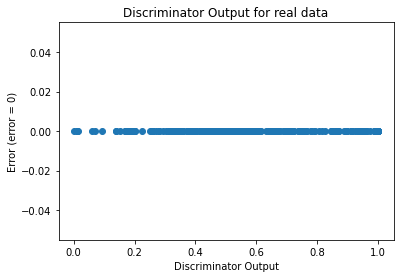

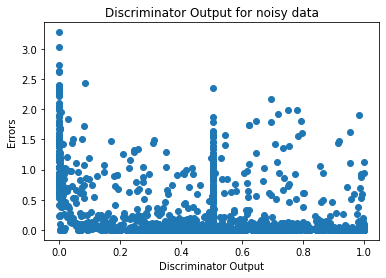

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [16]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

Number of epochs 265


In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

MSE
0.09362789263453951


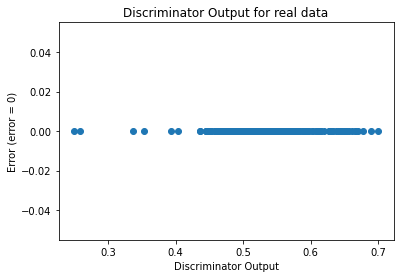

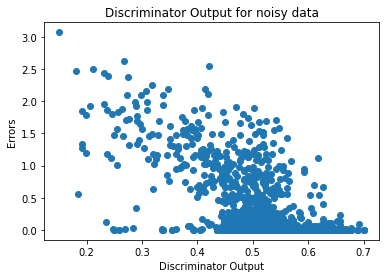

In [18]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.12116144737697732


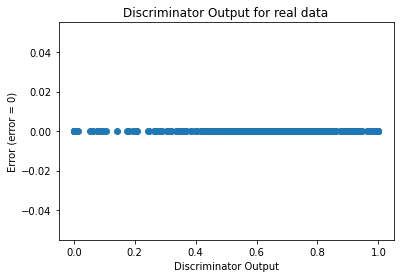

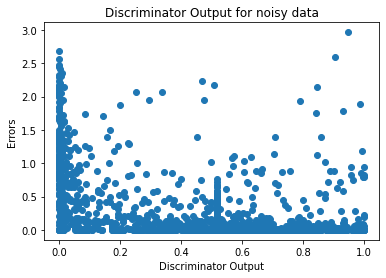

In [22]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [23]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8024]], requires_grad=True)
